<a href="https://colab.research.google.com/github/ciepielajan/SDA_SMOG_Wawelski/blob/main/Jan/DistanceMetric_haversine_uzupe%C5%82nienie_warto%C5%9Bci_z_najblizszych_sensorow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
!gdown --id "186S03hFJ67K4eV1BWb2_6lZxAYG7dBM4"

Downloading...
From: https://drive.google.com/uc?id=186S03hFJ67K4eV1BWb2_6lZxAYG7dBM4
To: /content/archive.zip
2.39MB [00:00, 75.5MB/s]


In [3]:
!unzip -q "archive.zip" -d data/

In [4]:
all_file_names = glob.glob("data/*2017.csv")
all_file_names = sorted(all_file_names)
for counter, file in enumerate(all_file_names):
    print(counter, file)

0 data/april-2017.csv
1 data/august-2017.csv
2 data/december-2017.csv
3 data/february-2017.csv
4 data/january-2017.csv
5 data/july-2017.csv
6 data/june-2017.csv
7 data/march-2017.csv
8 data/may-2017.csv
9 data/november-2017.csv
10 data/october-2017.csv
11 data/september-2017.csv


In [5]:
jan = pd.read_csv(all_file_names[4], parse_dates=['UTC time'])
feb = pd.read_csv(all_file_names[3], parse_dates=['UTC time'])
mar = pd.read_csv(all_file_names[7], parse_dates=['UTC time'])
apr = pd.read_csv(all_file_names[0], parse_dates=['UTC time'])
may = pd.read_csv(all_file_names[8], parse_dates=['UTC time'])
jun = pd.read_csv(all_file_names[6], parse_dates=['UTC time'])
jul = pd.read_csv(all_file_names[5], parse_dates=['UTC time']) 
aug = pd.read_csv(all_file_names[1], parse_dates=['UTC time']) 
sep = pd.read_csv(all_file_names[11], parse_dates=['UTC time']) 
octo = pd.read_csv(all_file_names[10], parse_dates=['UTC time']) 
nov = pd.read_csv(all_file_names[9], parse_dates=['UTC time']) 
dec = pd.read_csv(all_file_names[2], parse_dates=['UTC time'])

In [9]:
year = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec])
year["UTC time"] = pd.to_datetime(year["UTC time"], format="%Y-%m-%dT%H:%M:%S")
year = year.set_index("UTC time")
year.shape

(8593, 336)

In [10]:
year[:3]

,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
UTC time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,68.0,102279.0,115.0,127.0,196.0,-3.0,57.0,102505.0,196.0,222.0,346.0,0.0,49.0,102689.0,124.0,145.0,229.0,2.0,25.0,102379.0,148.0,176.0,277.0,1.0,27.0,102437.0,147.0,...,102253.0,184.0,218.0,322.0,0.0,54.0,101672.0,137.0,153.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,68.0,102228.0,105.0,116.0,180.0,-3.0,56.0,102454.0,187.0,211.0,330.0,0.0,49.0,102635.0,124.0,145.0,230.0,1.0,25.0,102325.0,131.0,156.0,247.0,0.0,27.0,102387.0,129.0,...,102201.0,146.0,169.0,250.0,0.0,52.0,101623.0,119.0,132.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,66.0,102149.0,110.0,121.0,189.0,-4.0,55.0,102375.0,187.0,212.0,333.0,0.0,49.0,102558.0,108.0,125.0,201.0,1.0,24.0,102244.0,108.0,127.0,203.0,1.0,27.0,102310.0,134.0,...,102119.0,138.0,160.0,237.0,0.0,49.0,101536.0,97.0,105.0,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
sensors = pd.read_csv("data/sensor_locations.csv")

In [14]:
sensors.head()

,id,latitude,longitude
0,3,50.057748,19.961375
1,140,50.057747,19.961374
2,142,50.084816,19.878066
3,147,50.048924,19.962262
4,169,50.048699,20.101569


In [21]:
from sklearn.neighbors import DistanceMetric

dist = DistanceMetric.get_metric('haversine')

arydist = dist.pairwise(sensors[['latitude','longitude']].to_numpy())*6371000/1000  #3798
datadist = pd.DataFrame(arydist,  columns=sensors.id, index=sensors.id).replace(0, np.nan)

datadist

id,3,140,142,147,169,170,171,172,173,174,176,177,178,179,180,181,182,183,184,185,187,189,192,194,195,196,201,202,203,204,205,208,209,210,211,212,213,214,215,216,218,219,220,221,222,223,225,226,227,228,263,622,713,808,857,895
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,NaN,0.008914,548.572036,56.488484,874.997005,429.780166,173.770805,476.090626,397.896071,289.889868,248.758840,326.342296,408.295639,204.232164,289.329796,90.998812,449.696252,574.373878,267.574089,426.874232,384.043707,208.005527,587.519644,425.888931,230.728098,57.502586,35.359328,388.266989,620.622390,130.035749,375.348921,268.389493,519.304030,360.303471,102.295752,416.677776,349.295578,89.215850,319.625343,238.314572,841.971054,615.903537,159.077952,337.994553,581.432743,252.883307,765.388131,525.367454,221.974023,444.273557,371.506078,102.344821,407.764935,384.047873,222.315819,549.283619
140,0.008914,NaN,548.568055,56.482753,875.002705,429.776014,173.778551,476.085776,397.889774,289.883533,248.762415,326.342275,408.287417,204.231224,289.327217,90.991521,449.698140,574.371109,267.566495,426.871142,384.043078,208.000244,587.513874,425.896435,230.735694,57.509418,35.350710,388.258320,620.630041,130.030966,375.346923,268.394683,519.302998,360.310202,102.286988,416.671250,349.290536,89.222631,319.634221,238.306371,841.964046,615.912138,159.080553,338.003181,581.425381,252.874515,765.380186,525.358541,221.975423,444.264684,371.500211,102.336057,407.756694,384.047244,222.317223,549.279650
142,548.572036,548.568055,NaN,573.398662,1414.554674,119.248160,566.226263,92.373507,212.210598,289.475557,797.113462,294.366934,357.910537,364.292345,784.460932,470.481852,990.563566,86.347952,351.035416,132.582977,242.976022,345.436350,141.770026,939.968712,754.301553,538.114067,525.889420,595.731658,1122.237783,419.446369,203.702739,485.003772,186.340042,892.122829,529.537201,215.379837,208.236783,534.120034,728.607001,398.216174,417.573061,1062.845858,446.745050,811.550182,285.907018,532.346151,459.732244,570.384649,763.193170,489.178271,770.320823,529.528245,360.155682,242.978071,763.549991,1.046374
147,56.488484,56.482753,573.398662,NaN,866.741997,454.163547,227.591187,495.578119,406.760615,299.842442,229.345399,371.308592,395.197412,246.797174,238.446018,102.919649,417.496703,606.109065,265.237243,457.493274,426.447079,228.027889,599.571707,436.714536,245.490537,113.555816,52.340931,344.525952,632.062319,156.603071,411.844625,324.740349,559.576537,363.778987,68.803073,423.329277,368.462612,145.227913,361.861927,228.327335,842.038615,641.643659,212.210597,365.861701,578.546510,213.113516,754.622973,490.382524,189.803997,414.900733,315.030917,68.847234,394.366376,426.451672,190.161071,574.176688
169,874.997005,875.002705,1414.554674,866.741997,NaN,1298.443924,861.594427,1348.908972,1271.768071,1163.870490,639.730963,1145.309956,1251.310908,1050.991374,755.050174,963.132142,519.368772,1424.574766,1131.727207,1285.311194,1207.677777,1082.704304,1462.498719,486.178952,660.575043,877.081347,904.037006,1103.095614,354.897052,1004.113149,1221.714258,977.665901,1340.155791,522.630836,929.243248,1289.376461,1223.218316,880.609136,741.224916,1092.402998,1707.400825,511.416111,971.378684,631.901487,1442.895273,1025.871664,1606.606007,1272.718511,693.464672,1230.788100,894.534136,929.274824,1250.080500,1207.679504,693.134319,1415.149504
170,429.780166,429.776014,119.248160,454.163547,1298.443924,NaN,458.134784,61.852530,127.568918,176.441456,678.131850,206.490112,283.866888,251.609480,667.456325,351.250804,871.399781,167.015994,241.735771,55.831810,172.987905,226.247206,192.292996,827.294275,639.106875,421.378852,406.696951,502.723375,1012.510805,300.369794,116.893388,391.488180,194.708912,776.586513,411.209734,142.396987,92.304576,419.263732,626.489924,287.534573,482.333945,961.569839,335.911594,703.114112,284.790761,424.728380,482.913411,504.990936,643.952491,415.117571,661.362862,411.202320,285.875509,172.992488,644.309253,120.018576
171,173.770805,173.778551,566.2

przekształcam matrix na tablicę

In [27]:
datadist = datadist.stack().to_frame()
datadist.index.rename(["id1", "id2"], inplace=True)
datadist.columns = ["distance"]
datadist.reset_index(inplace=True)
datadist = datadist.sort_values(by=["id1","distance"])
datadist

,id1,id2,distance
0,3,140,0.008914
25,3,201,35.359328
2,3,147,56.488484
24,3,196,57.502586
36,3,214,89.215850
...,...,...,...
3048,895,194,940.482052
3041,895,182,991.356705
3066,895,219,1063.154068
3053,895,203,1122.687084


znajdz najbliższe sensory

In [49]:
sensor_neighbors = {}

for sensor in datadist["id1"].unique():
  neighbors_list = datadist[["id2"]][datadist["id1"]== sensor].values.reshape(-1).tolist()
  sensor_neighbors[sensor] = neighbors_list

print(sensor_neighbors)

{3: [140, 201, 147, 196, 214, 181, 211, 622, 204, 220, 171, 179, 189, 227, 857, 195, 216, 176, 223, 184, 208, 180, 174, 215, 177, 221, 213, 210, 263, 205, 187, 808, 202, 173, 713, 178, 212, 194, 185, 170, 228, 182, 172, 209, 226, 142, 895, 183, 222, 192, 219, 203, 225, 218, 169], 140: [3, 201, 147, 196, 214, 181, 211, 622, 204, 220, 171, 179, 189, 227, 857, 195, 216, 176, 223, 184, 208, 180, 174, 215, 177, 221, 213, 210, 263, 205, 187, 808, 202, 173, 713, 178, 212, 194, 185, 170, 228, 182, 172, 209, 226, 142, 895, 183, 222, 192, 219, 203, 225, 218, 169], 142: [895, 183, 172, 170, 185, 192, 209, 205, 213, 173, 212, 187, 808, 222, 174, 177, 189, 184, 178, 713, 179, 216, 218, 204, 220, 225, 181, 208, 228, 201, 622, 211, 223, 214, 196, 140, 3, 171, 226, 147, 202, 215, 195, 227, 857, 263, 180, 176, 221, 210, 194, 182, 219, 203, 169], 147: [201, 140, 3, 211, 622, 181, 196, 214, 204, 227, 857, 220, 223, 171, 189, 216, 176, 180, 195, 179, 184, 174, 263, 208, 202, 215, 210, 221, 213, 177, 713, 

pobierz brakującą wartość uśrednioną wartość od X najbliższych sensorów

In [ ]:
year_whitout_nan = year
year_whitout_nan[:3]

In [ ]:
from numpy import nan

for time in year.index:
  for col in year.columns:
    value = year.loc[time][col]
    if np.isnan(value):
      sensor_id = int(col.split("_")[0])
      sensor_metrics = col.split("_")[1]
      
      # pobierz liste ID najbliższych sąsiadów
      sensor_neighbors_list = sensor_neighbors[sensor_id]
      # pobierz wartość danej jednostki X sąsiadów , usuń nan jeżeli takie sa i oblicz średnią
      neighbors = 3
      col_sensor_metrics = [ str(i)+"_"+sensor_metrics  for i in sensor_neighbors_list ] 
      col_sensor_values = year[col_sensor_metrics].loc[time]
      # usuń nany i policz średnią dla X najbliższych
      mean_neighbors = col_sensor_values.dropna()[:neighbors].mean()
      # podstaw pod nan nową wartość
      year_whitout_nan.loc[time][col] = mean_neighbors
      print()
      print(time, col, "value: ", value,"->",mean_neighbors)

In [228]:
year_whitout_nan[:3]

,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
UTC time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0.000000,46.0,102617.666667,150.333333,173.000000,283.666667,-0.333333,50.666667,102586.555556,163.111111,185.666667,289.555556,-4.0,68.0,102279.0,115.0,127.0,196.0,-3.0,57.0,102505.0,196.0,222.0,346.0,0.0,49.0,102689.0,124.0,145.0,229.0,2.0,25.0,102379.0,148.0,176.0,277.0,1.0,27.0,102437.0,147.0,...,102253.0,184.0,218.0,322.0,0.0,54.0,101672.0,137.0,153.0,235.0,-0.333333,43.000000,102595.246914,162.000000,187.666667,286.666667,0.0,38.000000,101889.666667,155.666667,183.000000,284.333333,2.382716,46.802469,102294.111111,95.444444,109.185185,190.283951,0.666667,48.666667,102512.000000,122.0,138.333333,213.333333,-1.222222,52.222222,102359.444444,105.000000,120.000000,187.000000
2017-01-01 01:00:00,-0.666667,46.0,102567.333333,147.666667,169.666667,277.666667,-0.888889,50.333333,102536.111111,159.555556,181.222222,282.888889,-5.0,68.0,102228.0,105.0,116.0,180.0,-3.0,56.0,102454.0,187.0,211.0,330.0,0.0,49.0,102635.0,124.0,145.0,230.0,1.0,25.0,102325.0,131.0,156.0,247.0,0.0,27.0,102387.0,129.0,...,102201.0,146.0,169.0,250.0,0.0,52.0,101623.0,119.0,132.0,203.0,-0.666667,42.333333,102544.716049,154.666667,178.666667,273.666667,0.0,36.666667,101839.555556,148.333333,174.000000,272.000000,1.395062,47.333333,102245.370370,95.592593,109.222222,188.320988,0.333333,48.000000,102457.074074,117.0,133.000000,205.666667,-2.111111,53.333333,102309.111111,101.666667,116.666667,183.000000
2017-01-01 02:00:00,-1.000000,45.0,102489.666667,152.666667,176.666667,286.666667,-1.333333,49.333333,102458.555556,163.555556,186.888889,291.222222,-5.0,66.0,102149.0,110.0,121.0,189.0,-4.0,55.0,102375.0,187.0,212.0,333.0,0.0,49.0,102558.0,108.0,125.0,201.0,1.0,24.0,102244.0,108.0,127.0,203.0,1.0,27.0,102310.0,134.0,...,102119.0,138.0,160.0,237.0,0.0,49.0,101536.0,97.0,105.0,162.0,-1.000000,42.000000,102466.358025,158.333333,184.666667,283.000000,0.0,36.000000,101756.333333,146.333333,171.666667,269.666667,1.395062,45.308642,102165.370370,88.851852,101.407407,179.728395,0.666667,46.666667,102376.740741,114.0,128.666667,200.000000,-1.777778,50.111111,102229.333333,100.000000,114.333333,181.666667


In [212]:
year_whitout_nan.to_csv("year_whitout_nan.csv")

sprawdzmy czy zostały jakieś nany

In [213]:
year_whitout_nan.isnull().sum().sum()

1456

In [214]:
year_whitout_nan.isnull().sum()

3_temperature     0
3_humidity        1
3_pressure       25
3_pm1             0
3_pm25            0
                 ..
895_humidity      1
895_pressure     25
895_pm1           0
895_pm25          0
895_pm10          0
Length: 336, dtype: int64

In [221]:
year_whitout_nan[year_whitout_nan.isnull()]

,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
UTC time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-24 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-24 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-24 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

> zostały tylko te Nany z godzinami w których żaden sensor nie miał obserwacji. Funkcja nie miała skąd wziąść parametrów

In [ ]:
columns_pm10 = [ i  for i in year.columns if  i.split("_")[1] == "pm10"]

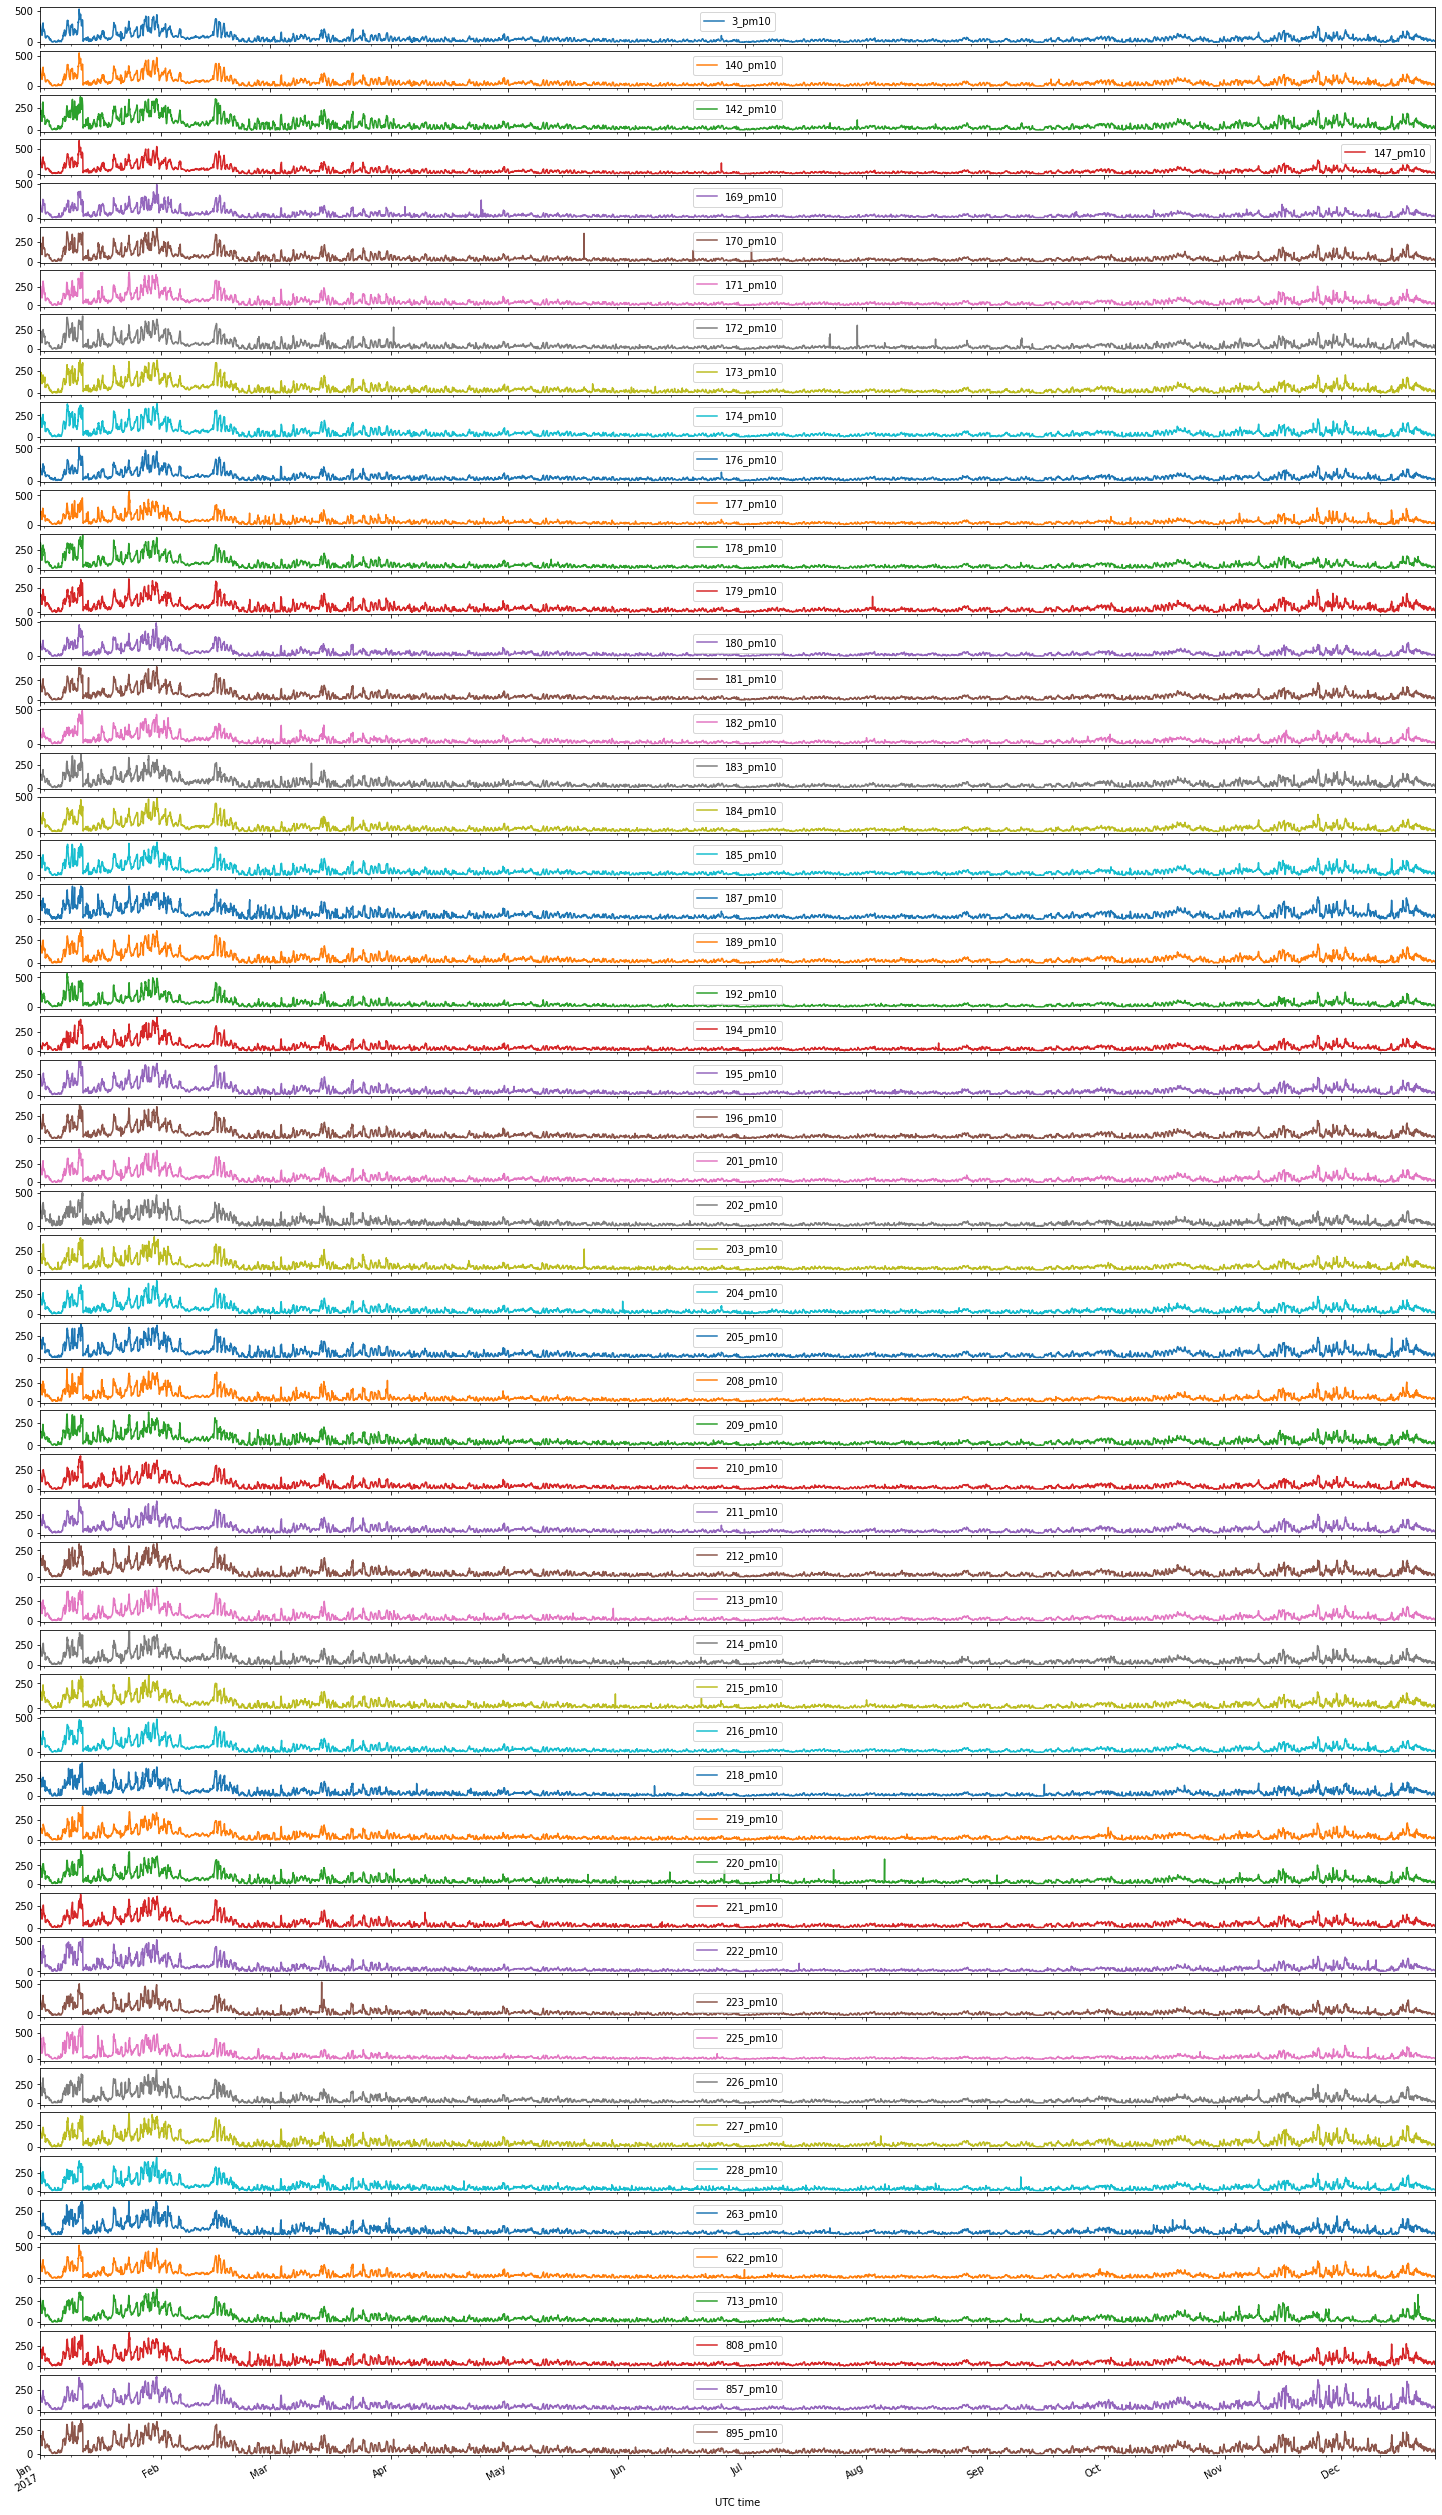

<Figure size 432x288 with 0 Axes>

In [227]:
year_whitout_nan[columns_pm10].plot(figsize=(25,50), legend=True, subplots=True)
plt.show()
plt.savefig('time-series-pm10.png')